In [10]:
import sys, os
#sys.path.append("C:/Users/lebobcrash/Documents/GitHub/Theano/")

import theano.tensor as T
sys.path.append("C:/Users/lebobcrash/Documents/GitHub/pygeomod/pygeomod")
sys.path.append("C:/Users/lebobcrash/Documents/GitHub/GeMpy/GeMpy")
import GeoMig
import importlib
#import geogrid
reload(GeoMig)
import importlib
#importlib.reload(GeoMig)
import numpy as np
import pandas as pn
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from skimage import measure

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
#%matplotlib inline
%matplotlib notebook

In [31]:
testmodel = GeoMig.Interpolator(0,200,
                                0,10,
                                0,100,
                               u_grade=0)

# set grid resolution
testmodel.set_resolutions(200,4,100)
testmodel.create_regular_grid_3D()

# compile
testmodel.theano_compilation_3D()

C:\Users\lebobcrash\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


In [32]:
testmodel.load_data_csv("foliations", "foliations.csv")
testmodel.load_data_csv("interfaces", "interfaces.csv")
testmodel.Foliations = testmodel.Foliations.drop('Unnamed: 0', 1)
testmodel.Interfaces = testmodel.Interfaces.drop('Unnamed: 0', 1)
testmodel.Foliations.head()

,X,Y,Z,azimuth,dip,polarity,formation
0,0.0,0.0,46.0,90.0,-37.874984,1.0,Layer1
1,0.0,0.0,30.0,90.0,-35.837653,1.0,Layer2
2,0.0,0.0,13.0,90.0,-35.837653,1.0,Layer3
3,0.0,0.0,63.0,90.0,-3.179830,1.0,Layer5
4,20.0,0.0,47.0,90.0,-41.633539,1.0,Layer2


In [33]:
testmodel.Interfaces.head()

,X,Y,Z,formation
0,0.0,0.0,39.0,Layer1
1,0.0,0.0,24.0,Layer2
2,0.0,0.0,7.0,Layer3
3,0.0,0.0,63.0,Layer5
4,10.0,0.0,47.0,Layer1


In [34]:
testmodel.formations

array(['Layer1', 'Layer2', 'Layer3', 'Layer5'], dtype=object)

In [35]:
testmodel.set_series({"Initial": (testmodel.formations[0],
                                  testmodel.formations[1],
                                  testmodel.formations[2]),
                      "Unconformity": testmodel.formations[3]
                     })

<IPython.core.display.Javascript object>


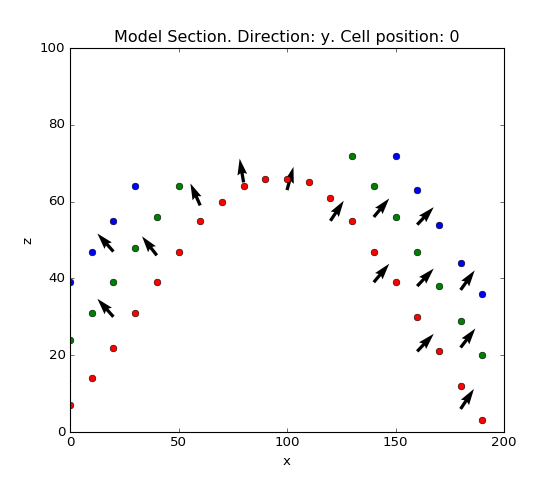

In [36]:
testmodel.compute_potential_field("Initial", verbose = 0)
testmodel.plot_potential_field_2D(direction = "y", cell_pos = 0, figsize=(7,6), contour_lines = 20)

The serie formations are Layer5


<IPython.core.display.Javascript object>


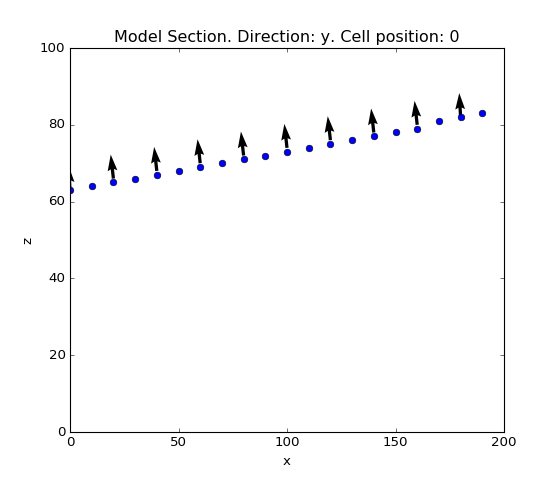

In [37]:
testmodel.compute_potential_field("Unconformity", verbose = 1)
testmodel.plot_potential_field_2D(direction = "y", cell_pos = 0, figsize=(7,6), contour_lines = 20)

4
(array([1, 1, 1, ..., 1, 1, 1]), 0)
The serie formations are Layer5
[1 2 3]
(array([1, 1, 1, ..., 0, 0, 0]), 21640)
The serie formations are Layer1|Layer2|Layer3


<IPython.core.display.Javascript object>


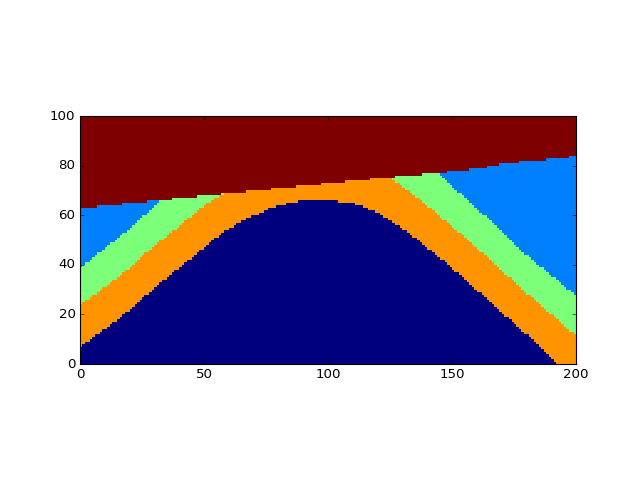

In [38]:
%matplotlib qt4
# Reset the block
testmodel.block.set_value(np.zeros_like(testmodel.grid[:,0]))

# Compute the block
testmodel.compute_block_model([0,1], verbose = 1)
sandstone = testmodel

plot_block =  sandstone.block.get_value().reshape(200,4,100)
plt.imshow(plot_block[:,2,:].T, origin = "bottom", aspect = "equal",
           extent = (sandstone.xmin, sandstone.xmax, 
                     sandstone.zmin, sandstone.zmax), interpolation = "none")